# Sample data from the Choroid plexus
Data comes from [GEO (GSM3687214)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3687214), and the data are included the the default adobo installation.

First we need to load the Python package:

In [1]:
import adobo as ad

adobo version 0.2.38. Documentation: https://oscar-franzen.github.io/adobo/


### Load the gene expression data
The parameter `bundled=True` makes adobo aware that this dataset is sample data and the user does not need to worry about paths. The `desc` parameter can be used to set a description of the dataset, can be a long description or a mnemonic. The `verbose=True` can be omitted, but instructs adobo to be more talkative. The `output_file` is a parameter we can use to set a filename where the object is saved as default. If `output_file` is set, then we can at anytime call the object function `save` to save the entire object to this file.

In [5]:
exp = ad.IO.load_from_file('GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz',
                           output_file='GSM3687214.joblib',
                           desc='Sample data (GSM3687214; Choroid plexus)',
                           bundled=True,
                           verbose=True)
# save the entire data object to "GSM3687214.joblib"
exp.save()

Using a sparse matrix structure, please wait
Generating cell summary statistics...
Memory usage of loaded data: 83.51 MB
27,998 genes and 4,055 cells were loaded
loading took 0.2 minutes


It's always a good idea to quickly inspect that the data were loaded properly.

In [6]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 27,998x4,055)

Commands executed:

Normalizations available:

norm_data structure:


The data matrix consists of 27,998 genes and 4,055 cells. Let's also inspect the raw read counts:

In [9]:
exp.count_data

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PISD,1,1,0,2,0,1,0,0,0,0,...,0,0,1,6,3,0,1,1,1,1
DHRSX,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


`count_data` is a [Pandas](https://pandas.pydata.org/) data frame. By default the data frame is sparse.

### Generate summary plots and identify quality thresholds

Using these plots we can identify outlier cells and identify thresholds for removing uninformative genes. A good start is to plot the total read counts per cell.

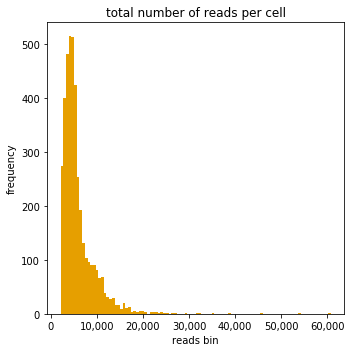

In [10]:
ad.plotting.overall(exp)

From the above histogram we can see that a few cells have excessive read counts. Let's count the the numbers of cells with at least 20,000 reads per cell:

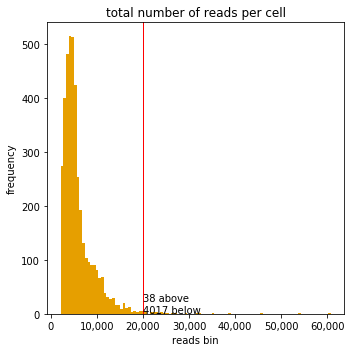

In [11]:
ad.plotting.overall(exp, cut_off=20000)

We can see that 38 cells are above the cut off, and we can decide to remove them later. But let's first explore how many genes are expressed per cell:

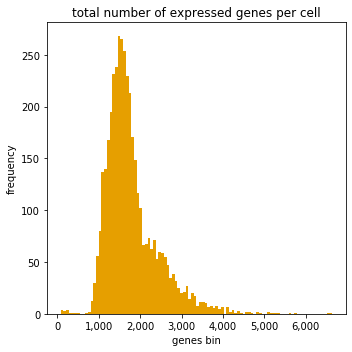

In [14]:
ad.plotting.overall(exp, what='genes')

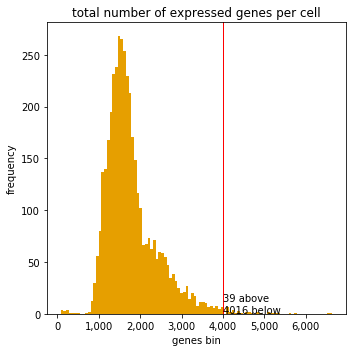

In [15]:
ad.plotting.overall(exp, what='genes', cut_off=4000)